In [200]:
#Libraries to be used
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [201]:
#DATA EXPLORATION
# We explored:
# 1. The first 10 rows of the dataset
# 2. The shape of the dataset
# 3. The data types of the columns
# 4. The values in each collum and it's number of missing values
# 5. The behaviour of values in each column (especially the class distribution column) identifying outliers.

# DATA PREPROCESSING:
# 1. Transformed a column name to correct a typo
# 2. Corrected the data type for all columns
# 3. Transformed all missing values from '?' to NaN.

# Needed to decide:
# 1. How to handle missing values
# 2. How to handle outliers
# 3. How to handle class imbalance


In [202]:
# Load the dataset
df = pd.read_csv('hcc_dataset.csv')

# Display the first 10 rows of the dataframe
df.head(10)


,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,Diabetes,Obesity,Hemochro,AHT,CRI,HIV,NASH,Varices,Spleno,PHT,PVT,Metastasis,Hallmark,Age,Grams_day,Packs_year,PS,Encephalopathy,Ascites,INR,AFP,Hemoglobin,MCV,Leucocytes,Platelets,Albumin,Total_Bil,ALT,AST,GGT,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,Male,No,Yes,No,No,No,No,Yes,No,Yes,Yes,?,Yes,No,No,No,No,Yes,No,No,No,No,Yes,67,137,15,Active,NaN,NaN,1.53,95,13.7,106.6,4.9,99,3.4,2.1,34,41,183,150,7.1,0.7,1,3.5,0.5,?,?,?,Lives
1,Female,?,No,No,No,No,Yes,Yes,?,?,Yes,No,No,Yes,No,No,No,Yes,No,No,No,No,Yes,62,0,?,Active,NaN,NaN,?,?,?,?,?,?,?,?,?,?,?,?,?,?,1,1.8,?,?,?,?,Lives
2,Male,No,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,No,Yes,Yes,No,No,No,No,Yes,No,Yes,Yes,78,50,50,Ambulatory,NaN,Mild,0.96,5.8,8.9,79.8,8.4,472,3.3,0.4,58,68,202,109,7,2.1,5,13,0.1,28,6,16,Lives
3,Male,Yes,Yes,No,No,No,No,Yes,No,Yes,Yes,No,No,Yes,No,No,No,No,No,No,No,Yes,Yes,77,40,30,Active,NaN,NaN,0.95,2440,13.4,97.1,9,279,3.7,0.4,16,64,94,174,8.1,1.11,2,15.7,0.2,?,?,?,Dies
4,Male,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,No,Yes,Yes,No,No,No,No,No,No,No,Yes,76,100,30,Active,NaN,NaN,0.94,49,14.3,95.1,6.4,199,4.1,0.7,147,306,173,109,6.9,1.8,1,9,?,59,15,22,Lives
5,Male,No,Yes,No,?,No,No,Yes,No,?,No,Yes,No,No,No,No,No,Yes,Yes,Yes,No,No,Yes,75,?,?,Restricted,NaN,Mild,1.58,110,13.4,91.5,5.4,85,3.4,3.5,91,122,242,396,5.6,0.9,1,10,1.4,53,22,111,Dies
6,Male,No,No,No,?,Yes,Yes,Yes,No,No,Yes,No,?,No,No,No,No,No,No,No,No,No,Yes,49,0,0,Active,NaN,NaN,1.4,138.9,10.4,102,3.2,42000,2.35,2.72,119,183,143,211,7.3,0.8,5,2.6,2.19,171,126,1452,Dies
7,Male,Yes,Yes,No,?,No,No,Yes,No,Yes,Yes,?,No,No,No,No,No,No,Yes,Yes,Yes,No,Yes,61,?,20,Selfcare,NaN,NaN,1.46,9860,10.8,92,3,58,3.1,3.2,79,108,184,300,7.1,0.52,2,9,1.3,42,25,706,Dies
8,Male,Yes,Yes,No,No,No,No,Yes,No,Yes,Yes,No,No,Yes,No,No,No,?,Yes,Yes,No,No,Yes,50,100,32,Restricted,NaN,Mild,3.14,8.8,11.9,107.5,4.9,70,1.9,3.3,26,59,115,63,6.1,0.59,1,6.4,1.2,85,73,982,Lives
9,Male,Yes,Yes,No,No,No,No,Yes,No,No,No,No,Yes,No,No,No,No,No,Yes,No,No,No,No,43,100,0,Active,NaN,NaN,1.12,1.8,11.8,87.8,5100,193000,4.2,0.5,71,45,256,303,7.1,0.59,1,9.3,0.7,?,?,?,Lives


In [203]:
# Get a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 50 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          165 non-null    object
 1   Symptoms        165 non-null    object
 2   Alcohol         165 non-null    object
 3   HBsAg           165 non-null    object
 4   HBeAg           165 non-null    object
 5   HBcAb           165 non-null    object
 6   HCVAb           165 non-null    object
 7   Cirrhosis       165 non-null    object
 8   Endemic         165 non-null    object
 9   Smoking         165 non-null    object
 10  Diabetes        165 non-null    object
 11  Obesity         165 non-null    object
 12  Hemochro        165 non-null    object
 13  AHT             165 non-null    object
 14  CRI             165 non-null    object
 15  HIV             165 non-null    object
 16  NASH            165 non-null    object
 17  Varices         165 non-null    object
 18  Spleno    

In [204]:
print(df.columns)

Index(['Gender', 'Symptoms', 'Alcohol', 'HBsAg', 'HBeAg', 'HBcAb', 'HCVAb',
       'Cirrhosis', 'Endemic', 'Smoking', 'Diabetes', 'Obesity', 'Hemochro',
       'AHT', 'CRI', 'HIV', 'NASH', 'Varices', 'Spleno', 'PHT', 'PVT',
       'Metastasis', 'Hallmark', 'Age', 'Grams_day', 'Packs_year', 'PS',
       'Encephalopathy', 'Ascites', 'INR', 'AFP', 'Hemoglobin', 'MCV',
       'Leucocytes', 'Platelets', ' Albumin', 'Total_Bil', 'ALT', 'AST', 'GGT',
       'ALP', 'TP', 'Creatinine', 'Nodules', 'Major_Dim', 'Dir_Bil', 'Iron',
       'Sat', 'Ferritin', 'Class'],
      dtype='object')


In [205]:
#The "Albumin" has a space before the name, so we need to remove it.
df.rename(columns={' Albumin':'Albumin'}, inplace=True)

In [206]:
#We observed that the data type of the columns are all 'object'. Looking at the data we can identify that there should have only categorical or numerical columns.
#To adress that we need to convert each column to correct type individually

# First, the ones that should be numerical:

numerical_columns = ['Age', 'Grams_day', 'Packs_year', 'INR', 'AFP', 'Hemoglobin', 'MCV', 'Leucocytes', 'Platelets', 'Albumin', 'Total_Bil', 'ALT', 'AST', 'GGT', 'ALP', 'TP', 'Creatinine', 'Nodules', 'Major_Dim', 'Dir_Bil', 'Iron', 'Sat', 'Ferritin']

for col in numerical_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')           


# Second, the ones that should be categoyrical:
# Get the names of all columns that are not mentioned
non_numerical_columns = [col for col in df.columns if col not in numerical_columns]

# Convert these columns to 'category' data type
for col in non_numerical_columns:
    df[col] = df[col].astype('category')


# Check the new data type for each column (Note that dtype is still "object" because the dataframe has different types of data in it.)
print(df.dtypes)


Gender            category
Symptoms          category
Alcohol           category
HBsAg             category
HBeAg             category
HBcAb             category
HCVAb             category
Cirrhosis         category
Endemic           category
Smoking           category
Diabetes          category
Obesity           category
Hemochro          category
AHT               category
CRI               category
HIV               category
NASH              category
Varices           category
Spleno            category
PHT               category
PVT               category
Metastasis        category
Hallmark          category
Age                  int64
Grams_day          float64
Packs_year         float64
PS                category
Encephalopathy    category
Ascites           category
INR                float64
AFP                float64
Hemoglobin         float64
MCV                float64
Leucocytes         float64
Platelets          float64
Albumin            float64
Total_Bil          float64
A

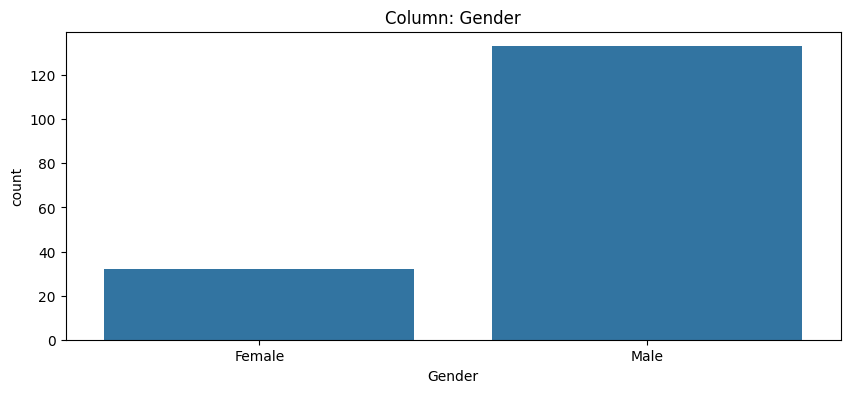

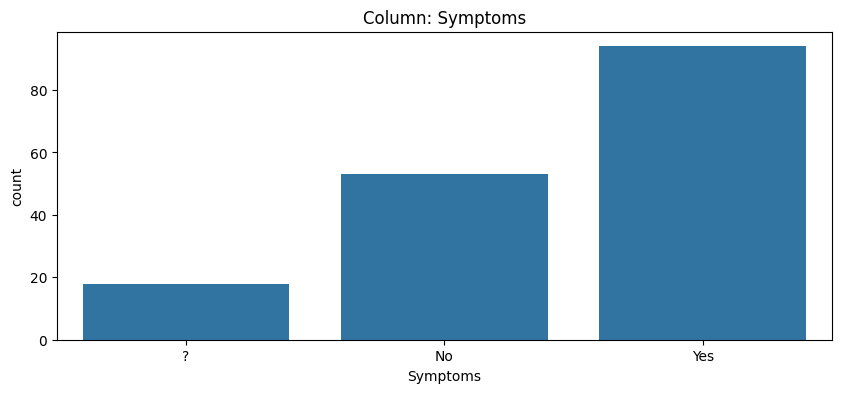

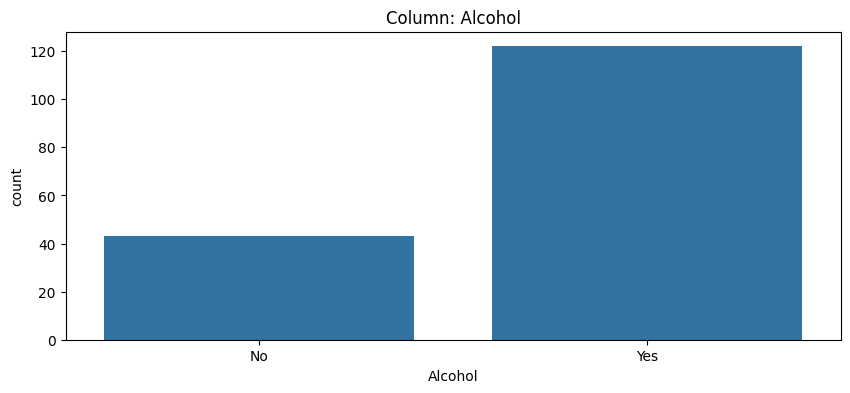

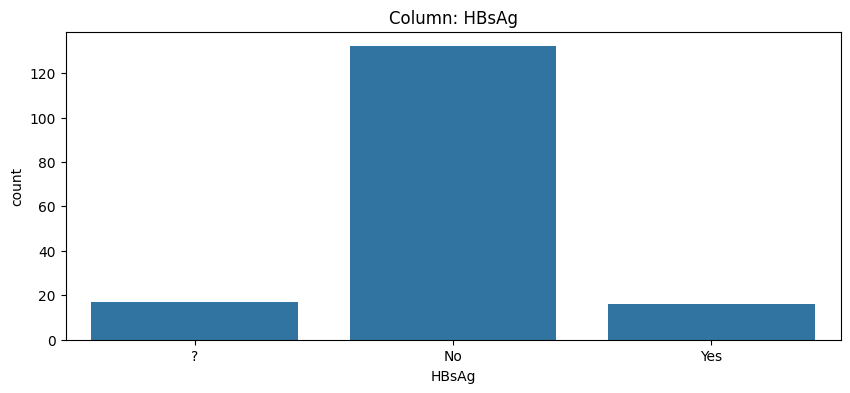

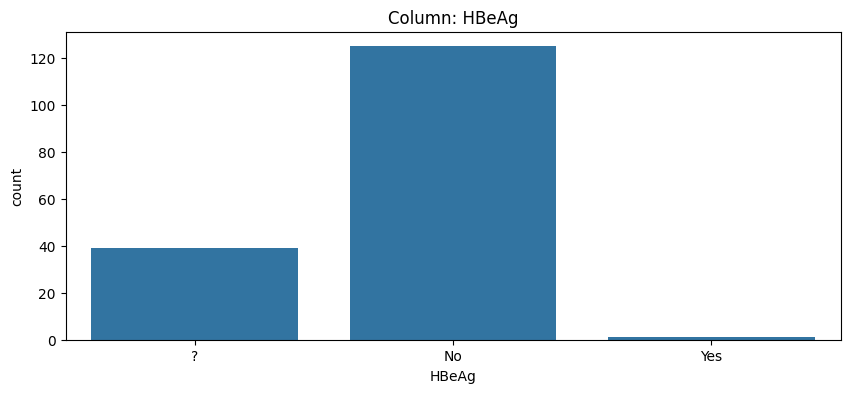

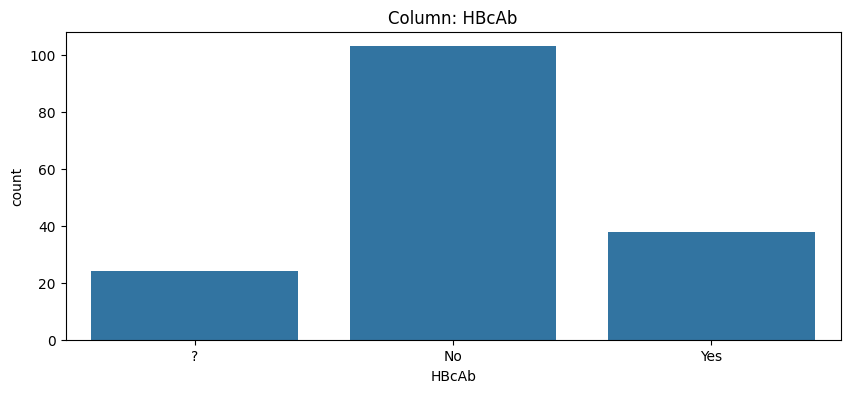

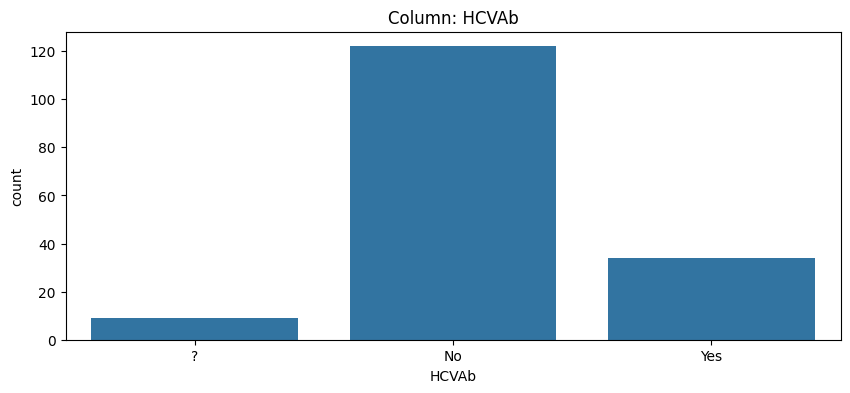

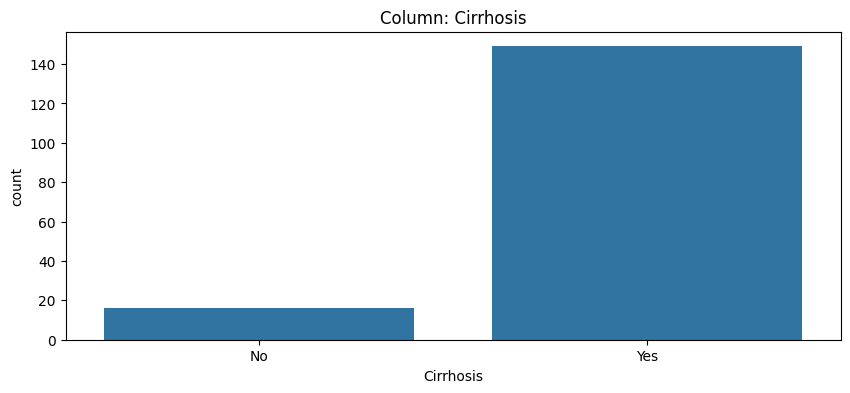

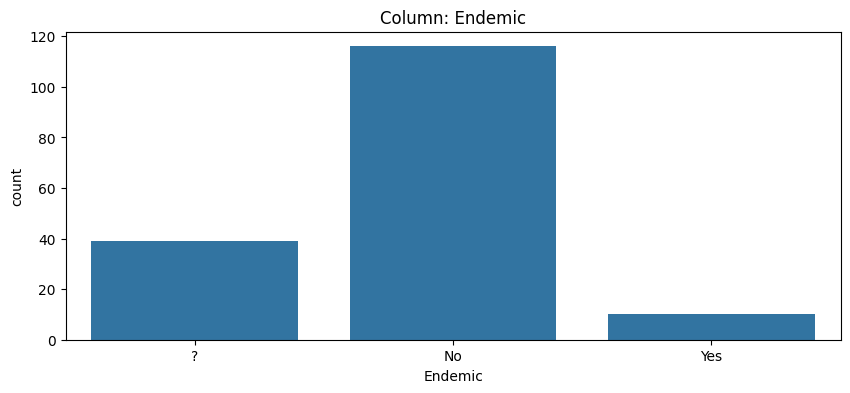

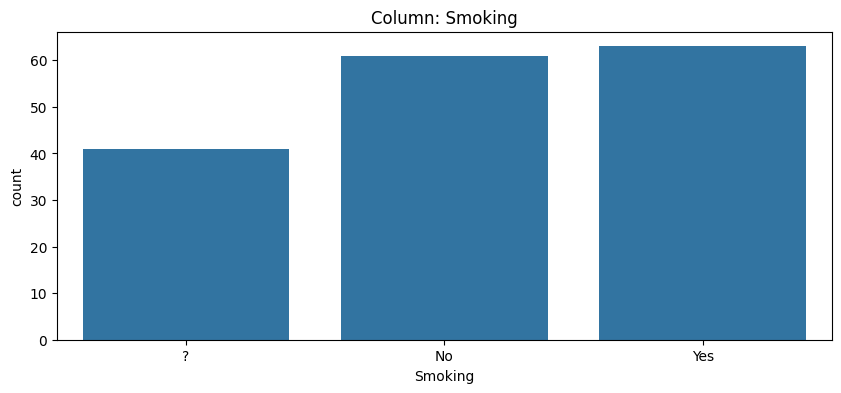

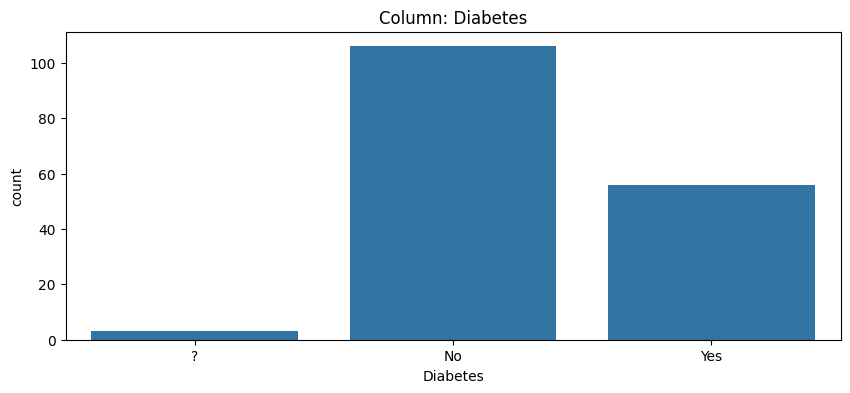

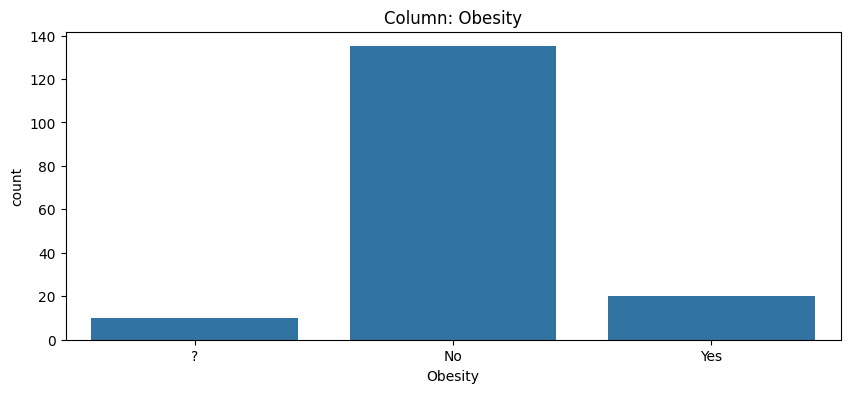

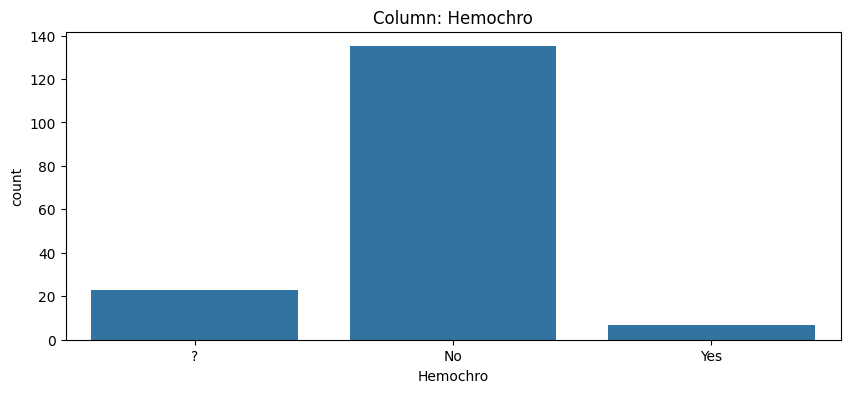

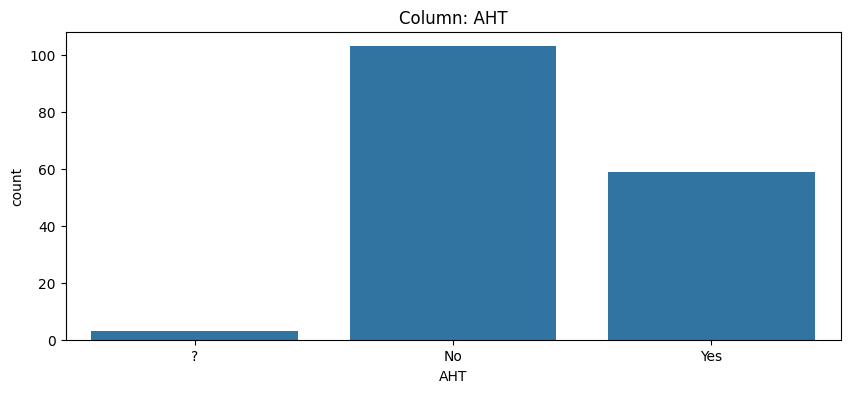

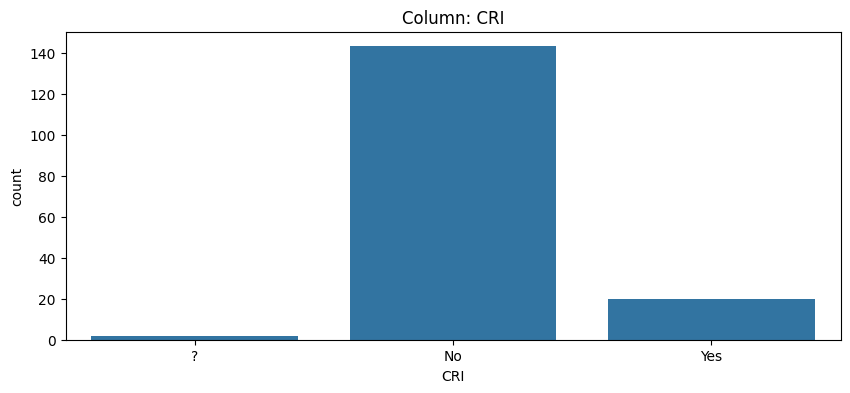

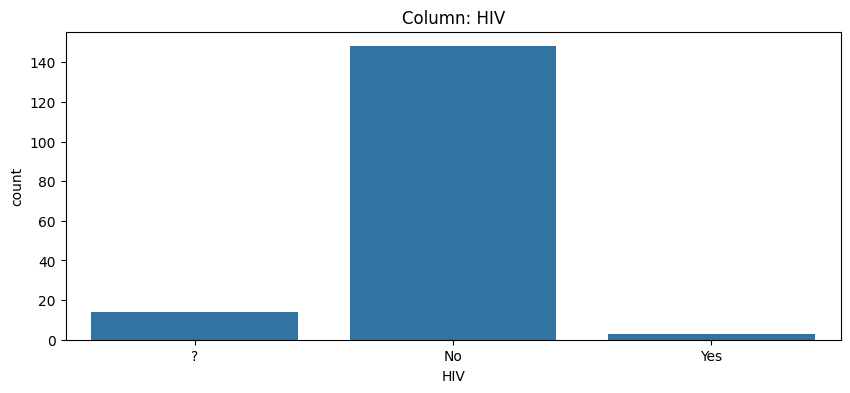

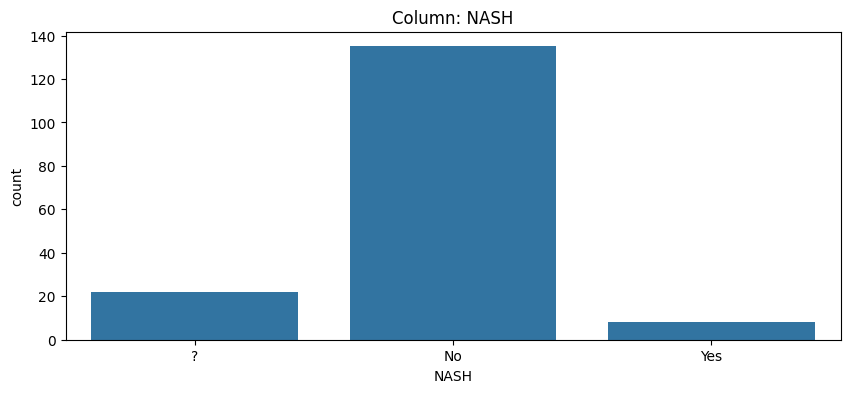

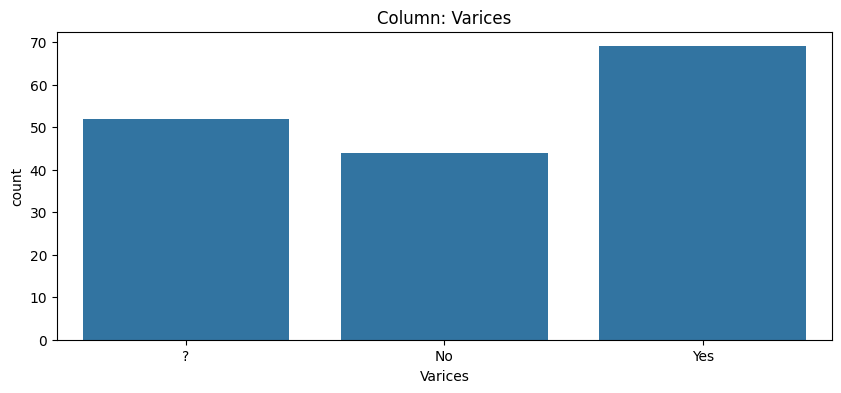

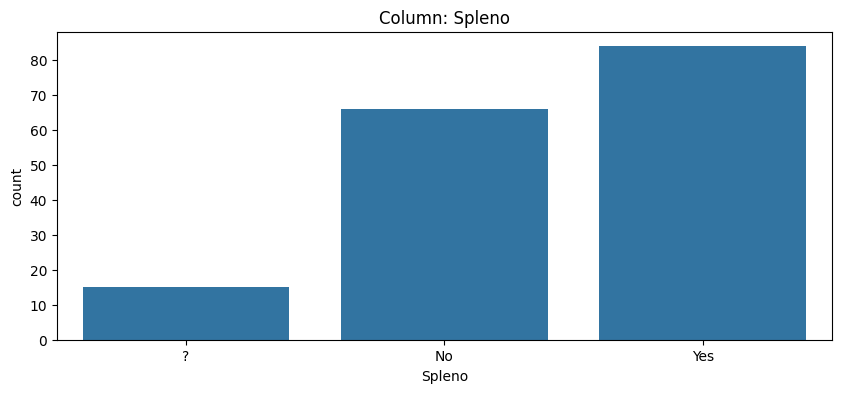

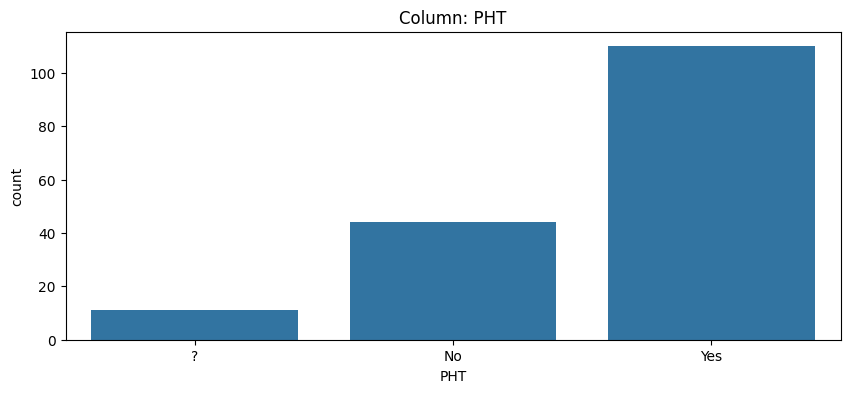

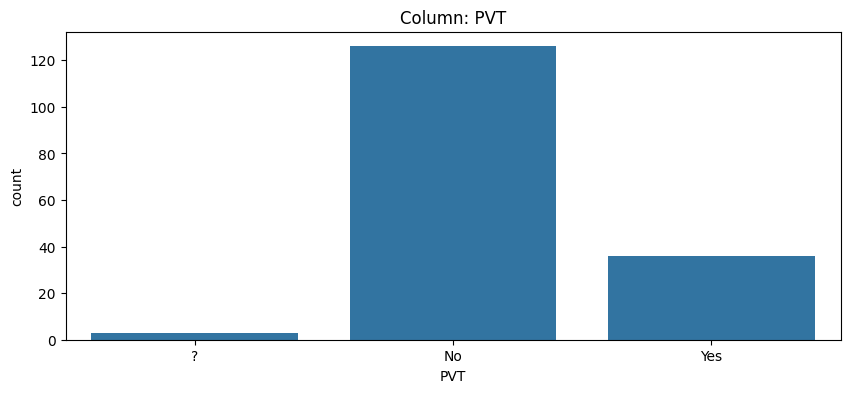

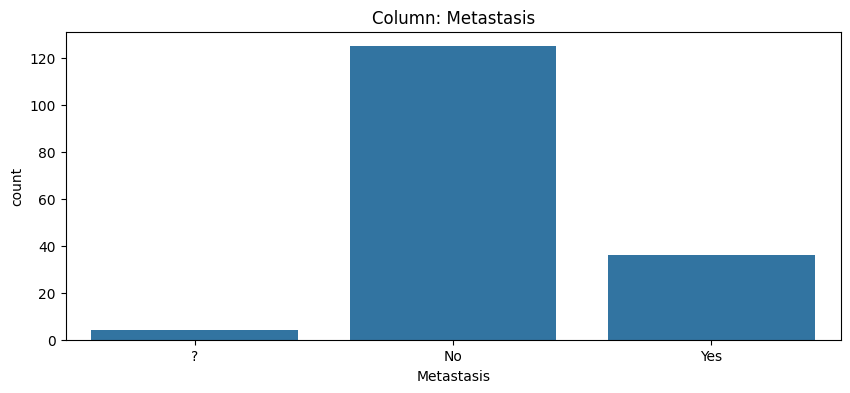

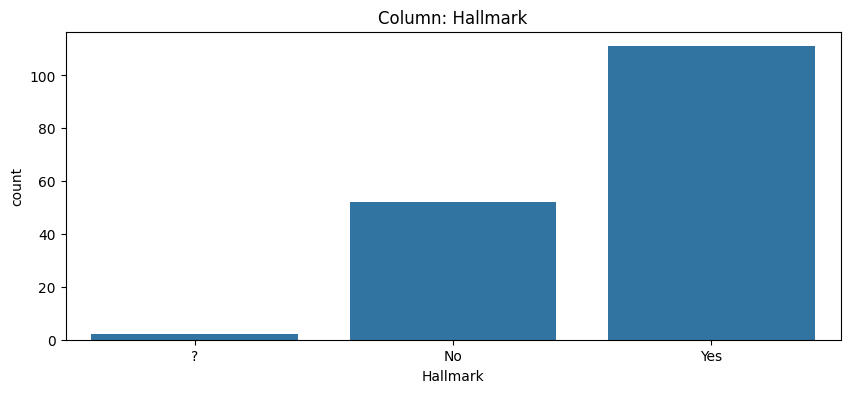

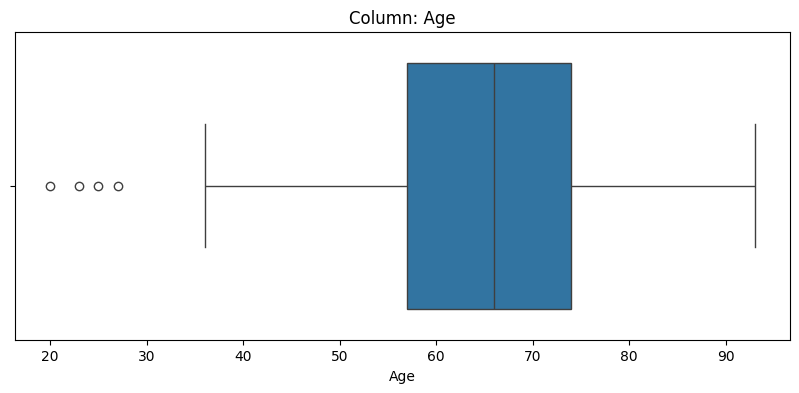

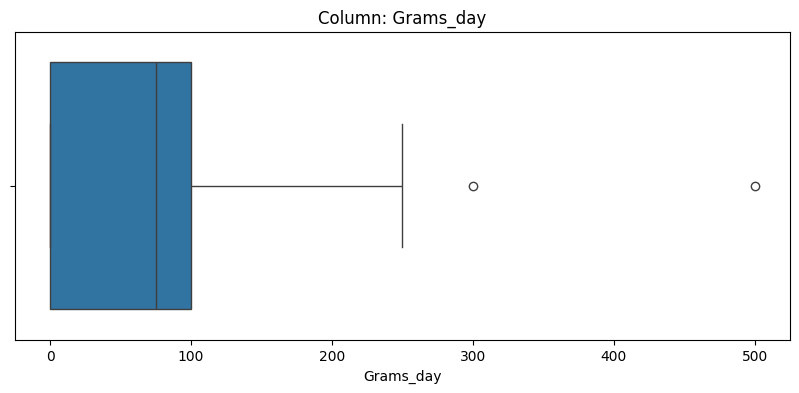

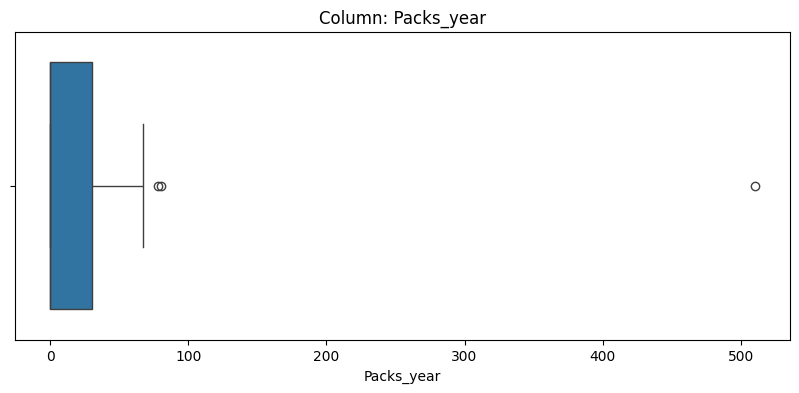

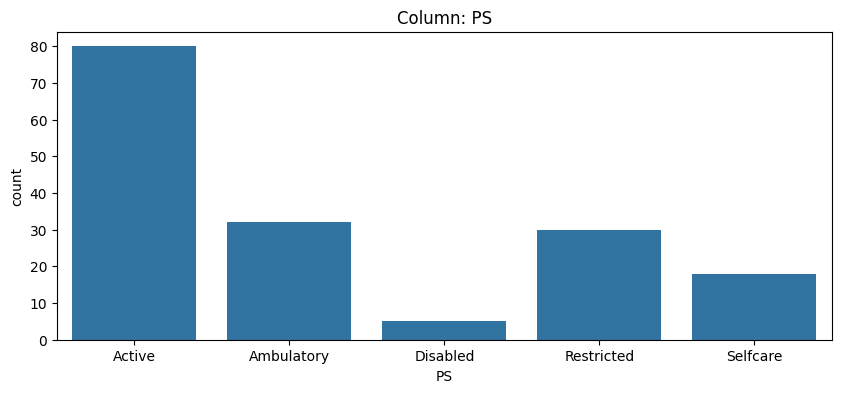

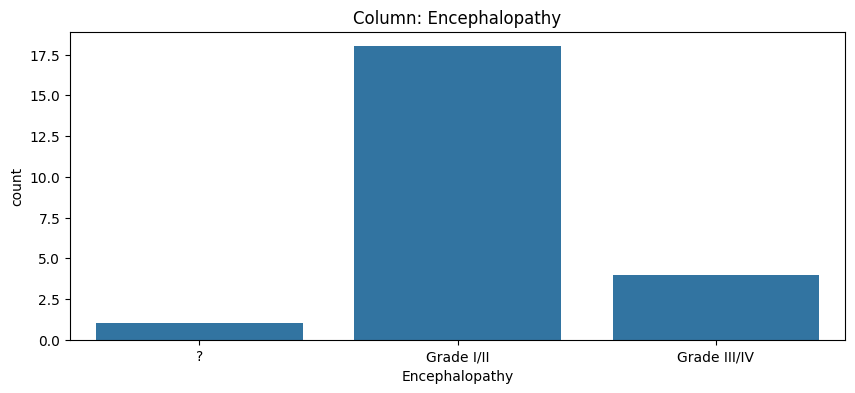

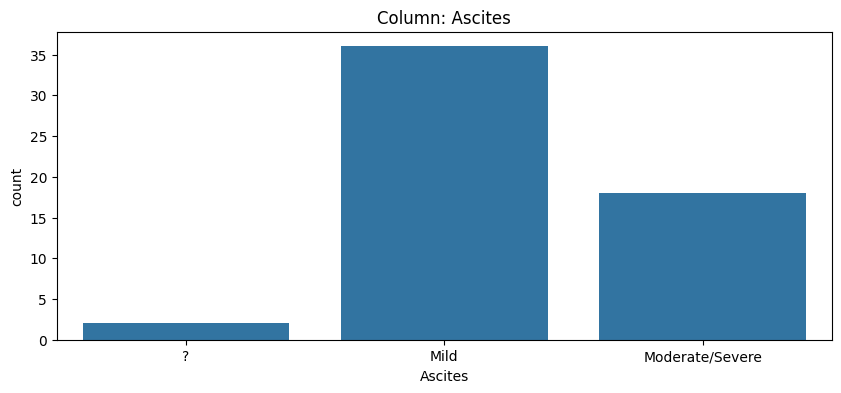

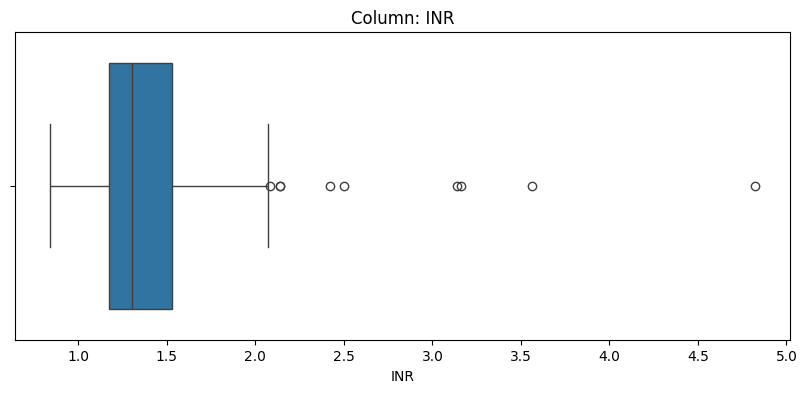

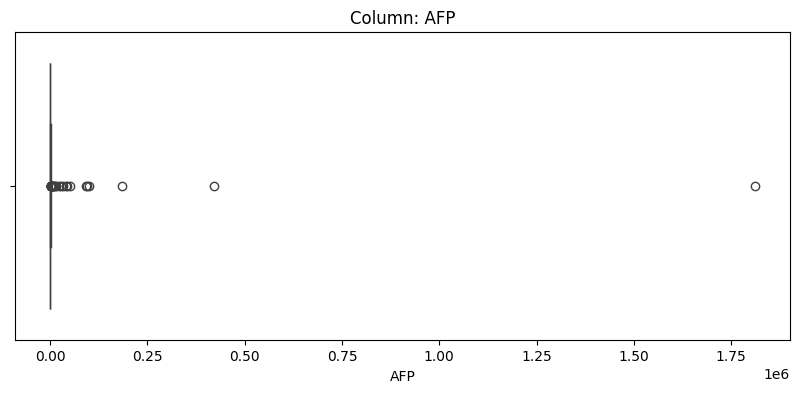

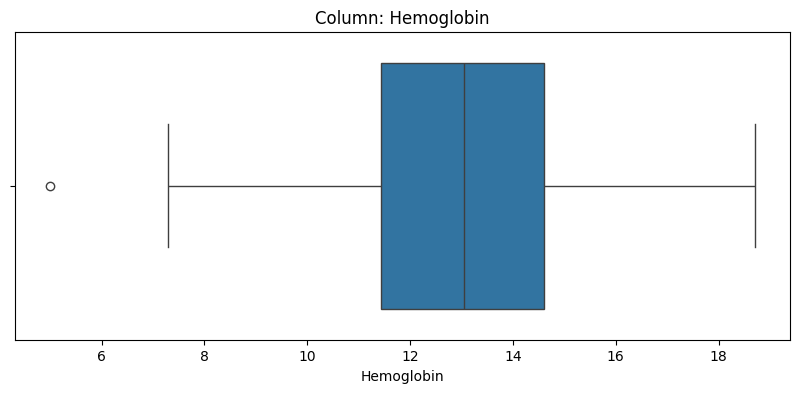

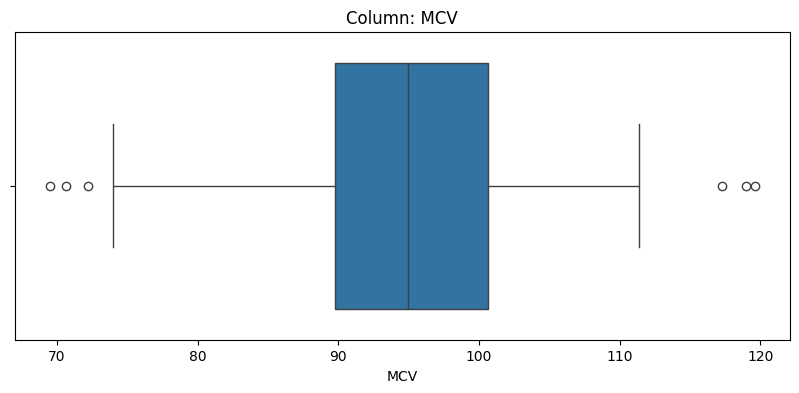

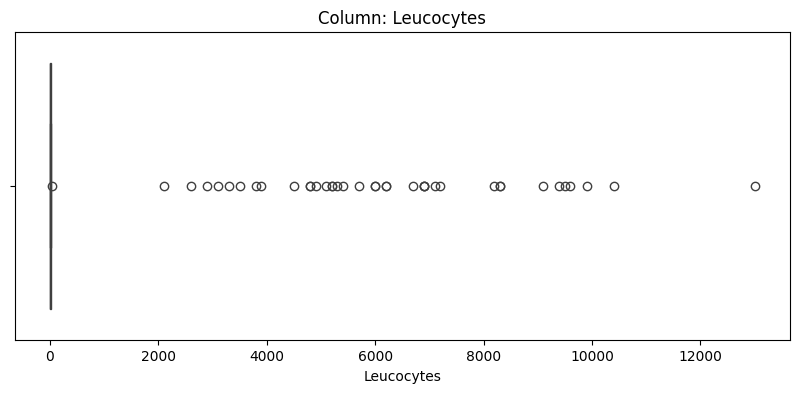

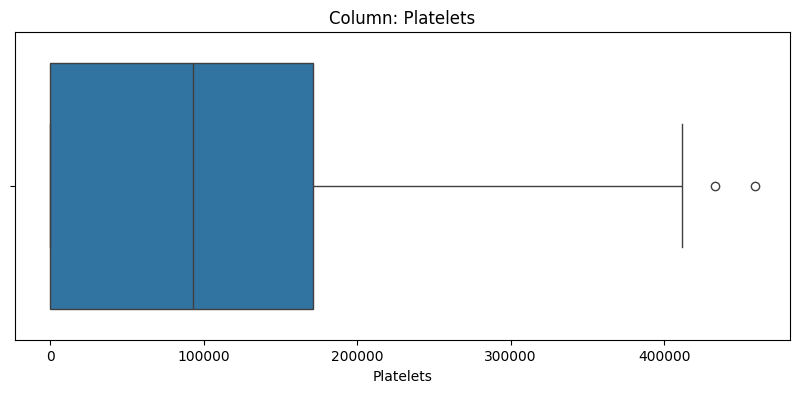

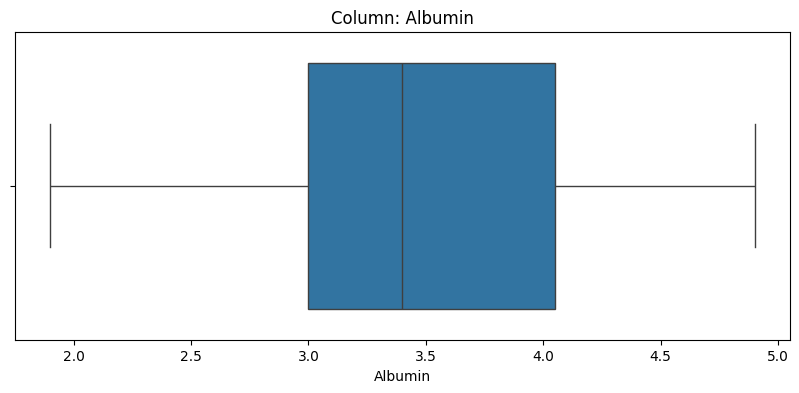

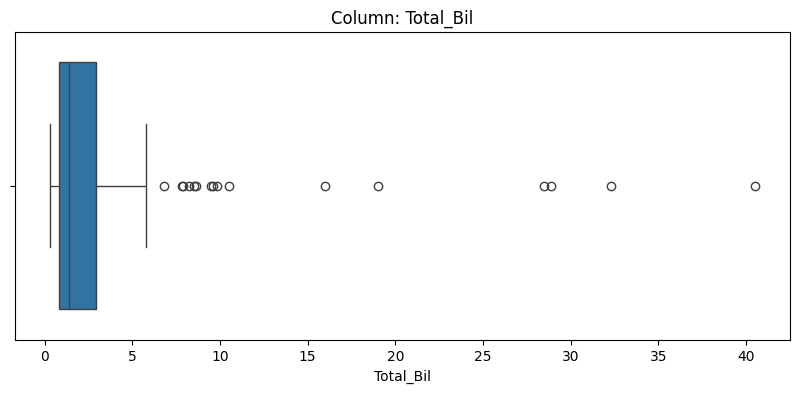

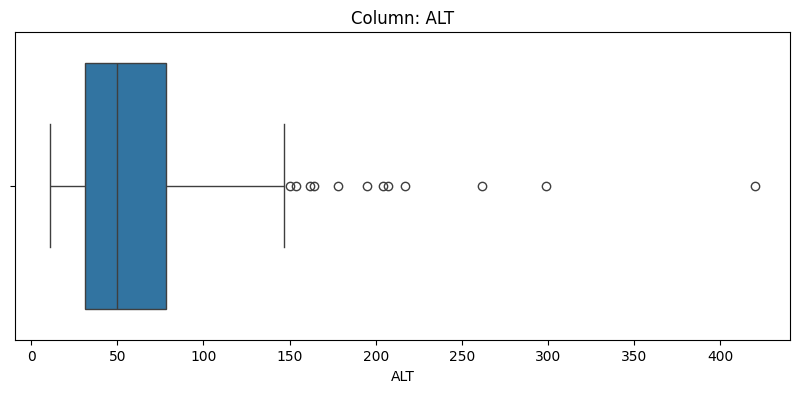

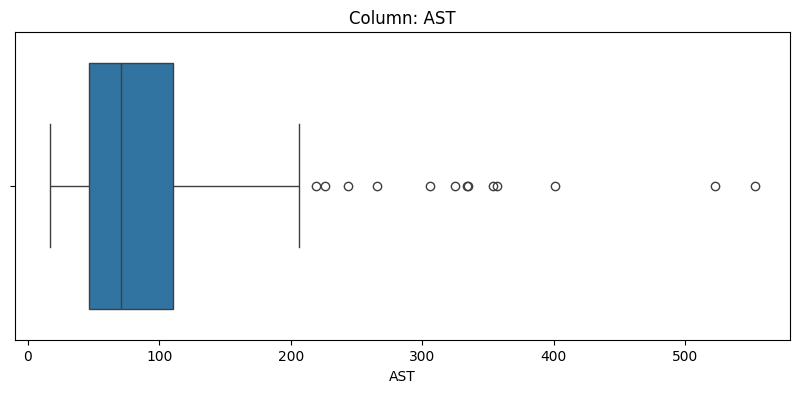

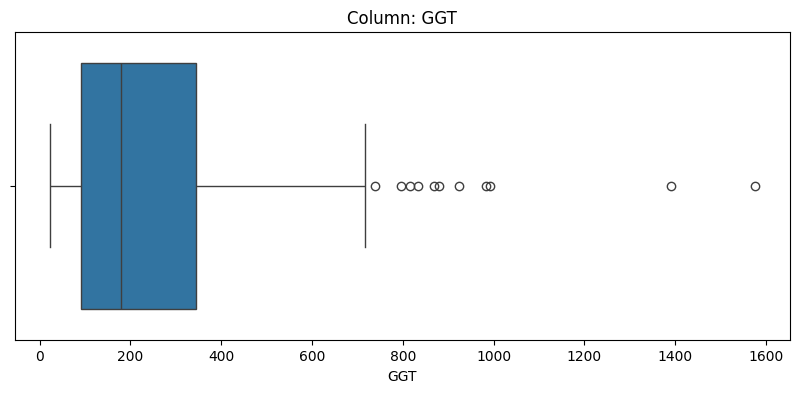

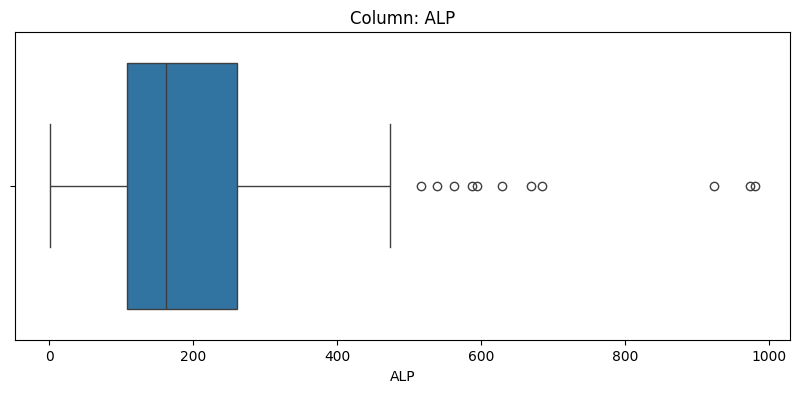

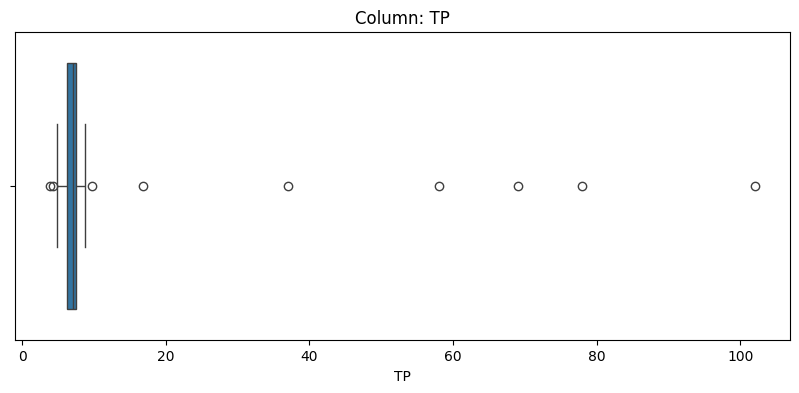

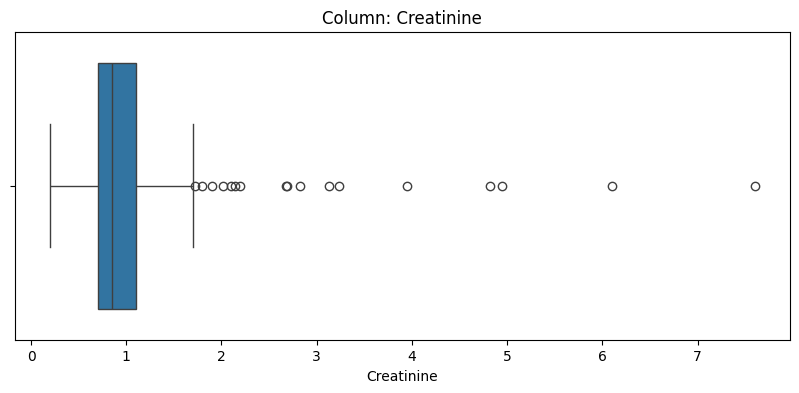

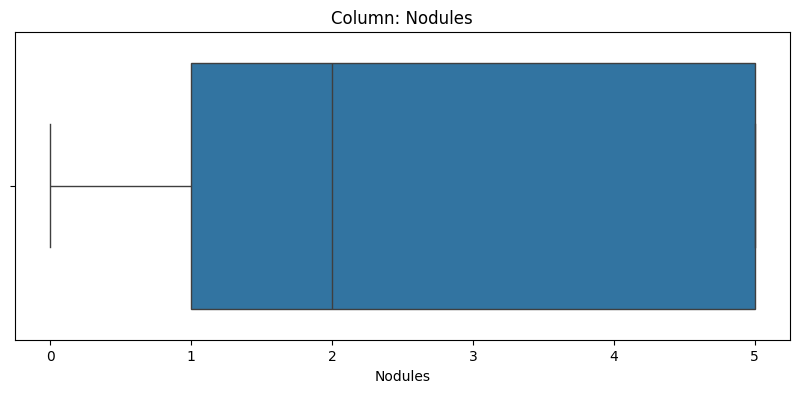

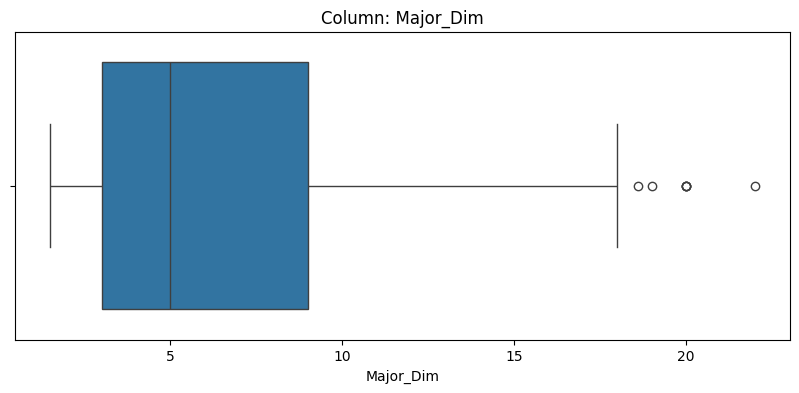

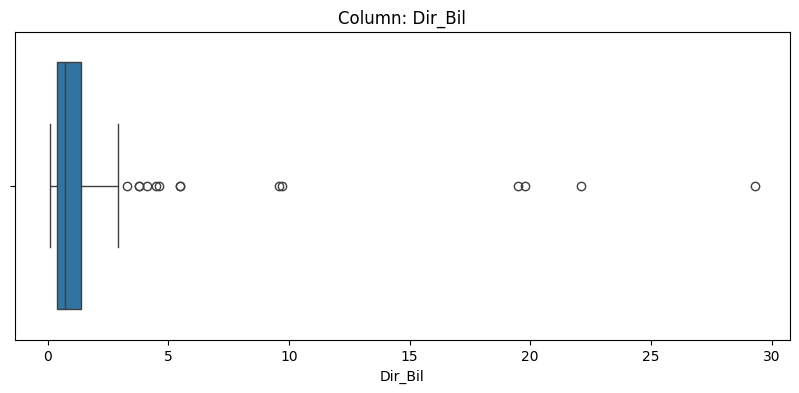

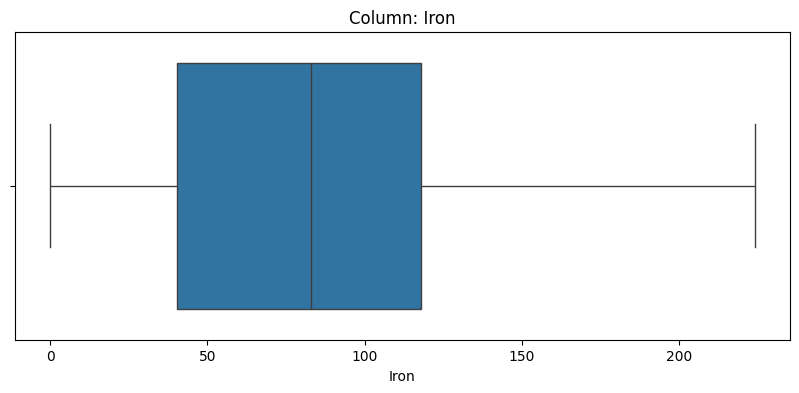

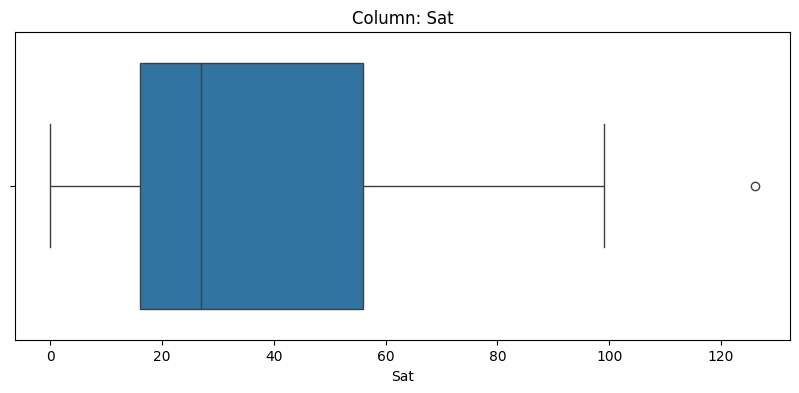

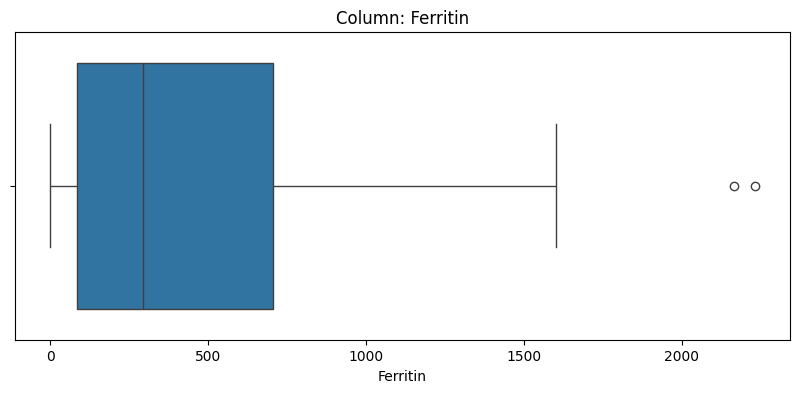

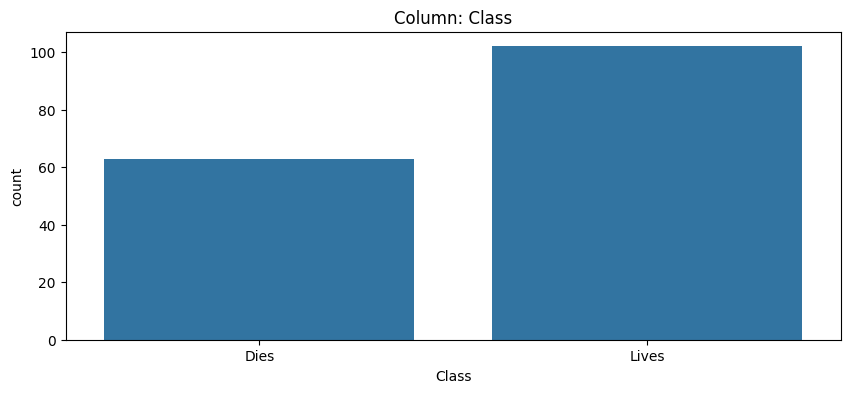

In [207]:
import seaborn as sns
import matplotlib.pyplot as plt

for column in df.columns:
    plt.figure(figsize=(10,4))
    
    if df[column].dtype in ['int64', 'float64']:
        sns.boxplot(x=df[column])  # Boxplot for numerical data
    else:
        sns.countplot(x=df[column])  # Countplot for categorical data
    
    plt.title(f"Column: {column}")
    plt.show()

# Note that pandas internally maps the category values to integers. So a column that is categorical will be stored as integers in the dataframe, so here as we are prints it's values, will be displayed as integers but is indeed categorical.


In [208]:
# The statistics for the 'AFP' column suggest that there are outliers in the data. The maximum value (1,810,346) is much larger than the 75th percentile (615), and the standard deviation is also quite large, indicating a high level of variability in the data.

# The large difference between the maximum value and the 75th percentile is likely causing the boxplot to appear skewed. The box in the boxplot represents the interquartile range (from the 25th to the 75th percentile), and the whiskers typically extend to the most extreme data points within 1.5 times the interquartile range from the box. Data points outside this range are considered outliers and are plotted as individual points.

# To handle these outliers, we might consider: winsorizing, log transformation, removing outliers, or binning. However, it's important to understand why these outliers are present before deciding how to handle them. They could be due to data entry errors, or they could be valid data points that represent rare but important events.

print(df['AFP'].describe())

print(df['Leucocytes'].describe())

count    1.570000e+02
mean     1.929995e+04
std      1.490983e+05
min      1.200000e+00
25%      5.200000e+00
50%      3.300000e+01
75%      6.150000e+02
max      1.810346e+06
Name: AFP, dtype: float64
count      162.000000
mean      1473.961549
std       2909.106006
min          2.200000
25%          5.100000
50%          7.200000
75%         19.525000
max      13000.000000
Name: Leucocytes, dtype: float64


In [209]:
#We can notice that there are '?' values in many columns of the dataset. These are assumed missing values. We need to handle them before we start to analyze the data. 

# List of columns with '?' as missing values

# Replace '?' with NaN throughout the dataframe
for col in df.columns:
    df[missing_value_columns] = df[missing_value_columns].replace('?', np.nan)

# Now we check the number of missing values in each column
print(df.isnull().sum())

# To make sure there is no '?' in the dataset you can run the code above.

Gender              0
Symptoms           18
Alcohol             0
HBsAg              17
HBeAg              39
HBcAb              24
HCVAb               9
Cirrhosis           0
Endemic            39
Smoking            41
Diabetes            3
Obesity            10
Hemochro           23
AHT                 3
CRI                 2
HIV                14
NASH               22
Varices            52
Spleno             15
PHT                11
PVT                 3
Metastasis          4
Hallmark            2
Age                 0
Grams_day          48
Packs_year         53
PS                  0
Encephalopathy    143
Ascites           111
INR                 4
AFP                 8
Hemoglobin          3
MCV                 3
Leucocytes          3
Platelets           3
Albumin             6
Total_Bil           5
ALT                 4
AST                 3
GGT                 3
ALP                 3
TP                 11
Creatinine          7
Nodules             2
Major_Dim          20
Dir_Bil   

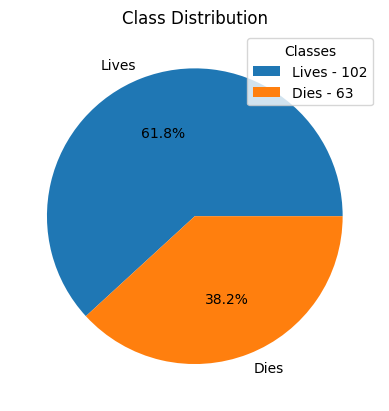

In [210]:
#About the call distribution, besides the info being above, we need to check the distribution of the target variable to see if it is balanced or not.
class_counts = df['Class'].value_counts()
class_counts.plot.pie(autopct='%1.1f%%')
plt.title('Class Distribution')
plt.ylabel('')

# Create a custom legend
legend_labels = [f'{cls} - {count}' for cls, count in zip(class_counts.index, class_counts)]
plt.legend(legend_labels, title="Classes", loc="best")

plt.show()

In [211]:
# # We observed that some numerical columns have outliers. We will use the Interquartile range method (IQR) to identify which are exacly and to handle these outliers.

#     # Explanation about the Interquartile range method (IQR) method:
#     # Sort your data from low to high.
#     # Identify the first quartile (Q1), the median, and the third quartile (Q3).
#     # Calculate your IQR = Q3 – Q1.
#     # Calculate your upper fence = Q3 + (1.5 * IQR)
#     # Calculate your lower fence = Q1 – (1.5 * IQR)
#     # Video to make it easy: https://www.youtube.com/watch?v=i7c2EQaKoqs

# # Loop over all columns
# for column in df.columns:
#     # Check if the column is numerical
#     if df[column].dtype in ['int64', 'float64']:
#         # Calculate Q1 (25th percentile) and Q3 (75th percentile)
#         Q1 = df[column].quantile(0.25)
#         Q3 = df[column].quantile(0.75)
#         IQR = Q3 - Q1

#         # Define outliers as those outside of Q1 - 1.5 * IQR or Q3 + 1.5 * IQR
#         outliers = df[(df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR)][column]
#         print(f"Outliers in {column} based on IQR method:")
#         for index, value in outliers.items():
#             print(f"Index: {index}, Value: {value}")

        
# #Now we have three options to handle the outliers:
# #1. Remove the outliers from the dataset (Good if outilier are duo error in data collection/entry)
# # df = df[~((df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR))]

# #2. Replace the outliers with the median value of the column (good if the outliers are duo to data entry errors and you dont want to lose the data)
# # df[column] = np.where((df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR), df[column].median(), df[column])

# #3. Cap the outliers to a specified value  (good if the outliers are valid data points)
# # In this approach, we will assume that the data was collectec correctly but limit their value.
        
#         # Cap the outliers to Q1 - 1.5 * IQR or Q3 + 1.5 * IQR
#         df[column] = np.where(df[column] < Q1 - 1.5 * IQR, Q1 - 1.5 * IQR, df[column])
#         df[column] = np.where(df[column] > Q3 + 1.5 * IQR, Q3 + 1.5 * IQR, df[column])
        
    
#     # Explanation about the Interquartile range method (IQR) method:
#     # Sort your data from low to high.
#     # Identify the first quartile (Q1), the median, and the third quartile (Q3).
#     # Calculate your IQR = Q3 – Q1.
#     # Calculate your upper fence = Q3 + (1.5 * IQR)
#     # Calculate your lower fence = Q1 – (1.5 * IQR)
#     # Video to make it easy: https://www.youtube.com/watch?v=i7c2EQaKoqs


Outliers in Age based on IQR method:
Index: 29, Value: 20
Index: 50, Value: 27
Index: 70, Value: 23
Index: 149, Value: 25
Outliers in Grams_day based on IQR method:
Index: 19, Value: 500.0
Index: 63, Value: 300.0
Outliers in Packs_year based on IQR method:
Index: 18, Value: 78.0
Index: 48, Value: 80.0
Index: 128, Value: 510.0
Outliers in INR based on IQR method:
Index: 8, Value: 3.14
Index: 16, Value: 2.14
Index: 23, Value: 4.82
Index: 56, Value: 3.56
Index: 76, Value: 3.16
Index: 79, Value: 2.08
Index: 117, Value: 2.42
Index: 131, Value: 2.5
Index: 163, Value: 2.14
Outliers in AFP based on IQR method:
Index: 3, Value: 2440.0
Index: 7, Value: 9860.0
Index: 10, Value: 100809.0
Index: 22, Value: 1975.0
Index: 24, Value: 5532.0
Index: 25, Value: 13327.0
Index: 28, Value: 3255.0
Index: 34, Value: 5689.0
Index: 42, Value: 185203.0
Index: 51, Value: 41470.0
Index: 54, Value: 1898.0
Index: 71, Value: 1810346.0
Index: 72, Value: 33502.0
Index: 75, Value: 2269.0
Index: 76, Value: 4181.0
Index: 